In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [5]:
dataset = pd.read_csv("H:\Programming\Python\Dataset\Wine\wine.csv")

In [6]:
dataset.head()
dataset.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,good


In [7]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,11]

<AxesSubplot:>

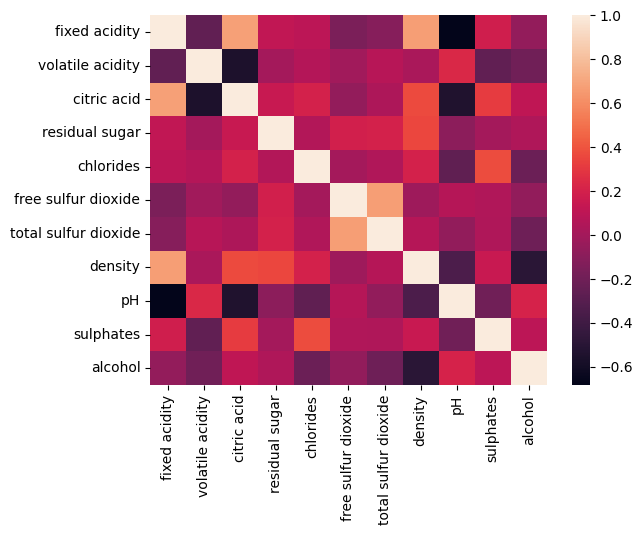

In [8]:
sns.heatmap(dataset.corr())

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .2, random_state = 0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
from sklearn.linear_model._logistic import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [12]:
y_pred = classifier.predict(x_test)

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print(cr)
print(cm)

              precision    recall  f1-score   support

         bad       0.73      0.74      0.73       148
        good       0.77      0.76      0.77       172

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320

[[109  39]
 [ 41 131]]


In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

rfc_pred = rfc.predict(x_test)


In [15]:
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[118  30]
 [ 25 147]]
              precision    recall  f1-score   support

         bad       0.83      0.80      0.81       148
        good       0.83      0.85      0.84       172

    accuracy                           0.83       320
   macro avg       0.83      0.83      0.83       320
weighted avg       0.83      0.83      0.83       320



In [22]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)

knc_pred = knc.predict(x_test)

In [26]:
print(classification_report(y_test, knc_pred))

              precision    recall  f1-score   support

         bad       0.69      0.60      0.64       226
        good       0.68      0.76      0.72       254

    accuracy                           0.69       480
   macro avg       0.69      0.68      0.68       480
weighted avg       0.69      0.69      0.68       480

